In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

from scipy.special import logsumexp
from scipy.optimize import curve_fit

In [27]:
N_data = np.array([113_265_216,
113_265_216,
113_265_216,
169_906_752,
169_906_752,
226_548_288,
226_548_288,
251_689_920,
251_689_920,
330_348_480,
330_348_480,
409_007_040,
409_007_040], dtype=np.float64)

D_data = np.array([12771328,
19156992,
25542656,
12771328,
19156992,
12771328,
19156992,
12771328,
19156992,
12771328,
19156992,
12771328,
19156992], dtype=np.float64)

L_data = np.array([1.9886,
0.43355,
0.086,
2.0748,
0.3522,
2.10401,
0.28972,
2.07423,
0.49875,
2.099,
0.3935,
2.32526,
0.46286])

flops = 6 * N_data * D_data

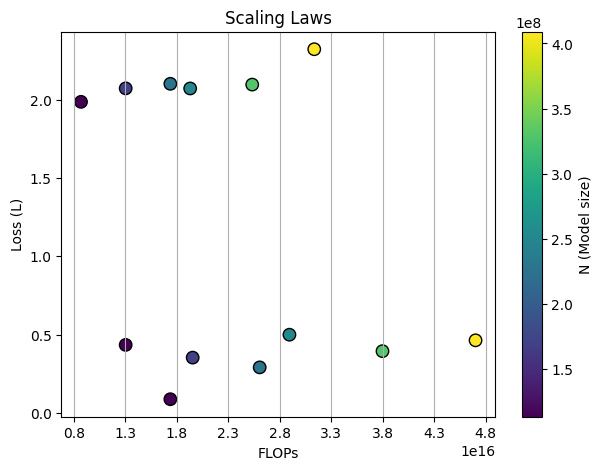

In [28]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Make a 2D scatter plot where color = L_data
scatter_plot = ax.scatter(
    x=flops,
    y=L_data,
    c=N_data,          # Color encode the loss
    cmap='viridis',    # Choose any matplotlib colormap
    s=80,              # Marker size
    edgecolors='black' # Optional styling
)

# Add a colorbar indicating the range of L values
cbar = plt.colorbar(scatter_plot, ax=ax)
cbar.set_label("N (Model size)")

# Label your axes
ax.set_xlabel("FLOPs")
ax.set_ylabel("Loss (L)")

plt.xticks(np.arange(0.8e16, 5e16, 0.5e16, dtype=np.float64))
ax.grid(which='major', axis='x', linestyle='-')

#ax.xaxis.grid()
plt.title("Scaling Laws")

plt.show()

In [29]:
def scaling_law_log(data, E, A, alpha, B, beta):
    N, D = data
    lse_terms = [np.array([E]*len(N)), A - (alpha * np.log(N)), B - (beta * np.log(D))]
    return logsumexp(lse_terms, axis=0)

In [30]:
p0 = [1.0, 10000, 0.5, 10000, 0.5]

# Fit the curve
popt, pcov = curve_fit(scaling_law_log, (N_data, D_data), np.log(L_data), p0=p0)
E_fit, A_fit, alpha_fit, B_fit, beta_fit = popt

/tmp/ipykernel_1004111/3770062309.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(scaling_law_log, (N_data, D_data), np.log(L_data), p0=p0)


In [32]:
print("Fitted parameters:")
print("  E      =", math.exp(E_fit))
print("  A      =", math.exp(A_fit))
print("  alpha  =", alpha_fit)
print("  B      =", math.exp(A_fit))
print("  beta   =", beta_fit)

Fitted parameters:
  E      = 3.635357098490792e-53
  A      = 4.307860352159638e+17
  alpha  = 14.72132544631764
  B      = 4.307860352159638e+17
  beta   = 4.330524363334771
